In [5]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

### Methode de Normalisation
- MinMax
  - Convenable pour la pluspart des situations 
  - Préférable pour certains algorithmes (ex: computer Vison)
  - A éviter si vous avez des valeur abérrantes
- Standardisation 
   - Adapté aux problèmes des valeurs aberrantes et les variables gaussienne   

In [6]:
Y = np.array([1.75,1.63,1.60])
X = np.array([70,78,90])

90-78+1.63-1.60, 78-70+1.75-1.63

(12.03, 8.120000000000001)

In [7]:
print(90-78+163-160, 78-70+175-163)

15 20


In [8]:
Y = np.array([1.75,1.63,1.60])
X = np.array([70,78,90])
X = (X-X.mean())/X.std()
Y = (Y-Y.mean())/Y.std()
X,Y

(array([-1.13554995, -0.16222142,  1.29777137]),
 array([ 1.38873015, -0.46291005, -0.9258201 ]))

In [9]:
abs(X[2]-X[1])+abs(Y[2]-Y[1]), abs(X[1]-X[0])+abs(Y[1]-Y[0])

(1.9229028400631356, 2.82496872632968)

In [10]:
Y = np.array([1.75,1.63,1.60])
X = np.array([70,78,90])
X = (X-X.min())/(X.max()-X.min())
Y = (Y-Y.min())/(Y.max()-Y.min())
X,Y

(array([0. , 0.4, 1. ]), array([1. , 0.2, 0. ]))

In [11]:
abs(X[2]-X[1])+abs(Y[2]-Y[1]), abs(X[1]-X[0])+abs(Y[1]-Y[0])

(0.7999999999999988, 1.200000000000001)

## Data Diamonds

In [12]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df_numeric = df.select_dtypes(exclude='category')
df_numeric.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


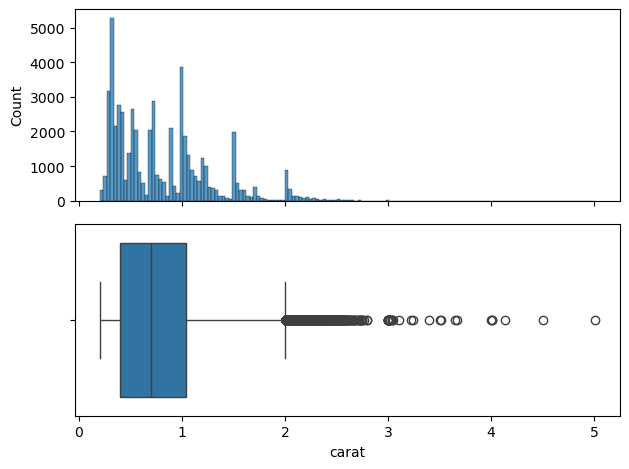

In [14]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='carat', ax=ax[0])
sns.boxplot(df_numeric, x='carat', ax=ax[1])
plt.tight_layout()
plt.show()

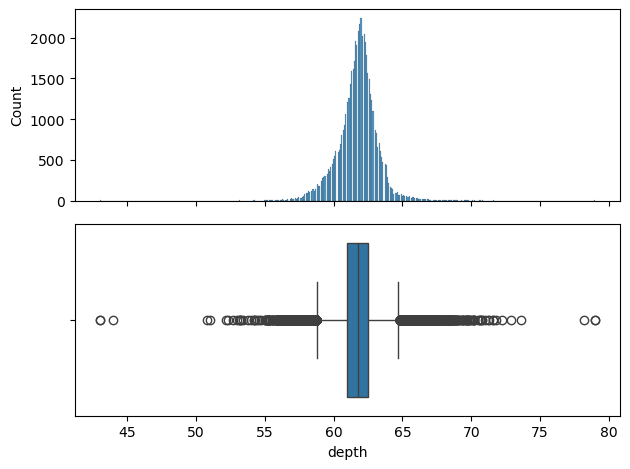

In [15]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='depth', ax=ax[0])
sns.boxplot(df_numeric, x='depth', ax=ax[1])
plt.tight_layout()
plt.show()

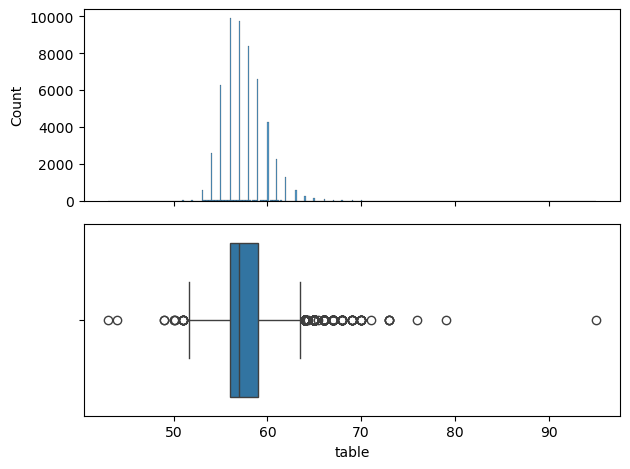

In [16]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='table', ax=ax[0])
sns.boxplot(df_numeric, x='table', ax=ax[1])
plt.tight_layout()
plt.show()

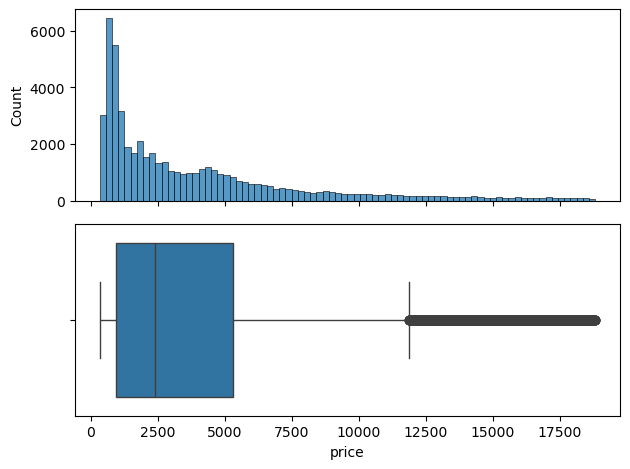

In [17]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='price', ax=ax[0])
sns.boxplot(df_numeric, x='price', ax=ax[1])
plt.tight_layout()
plt.show()

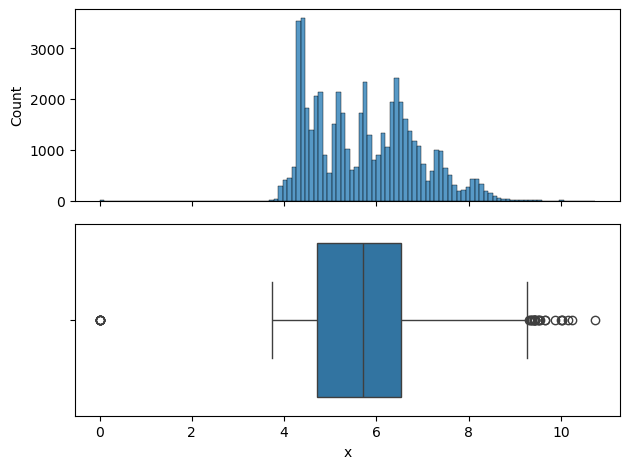

In [18]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='x', ax=ax[0])
sns.boxplot(df_numeric, x='x', ax=ax[1])
plt.tight_layout()
plt.show()

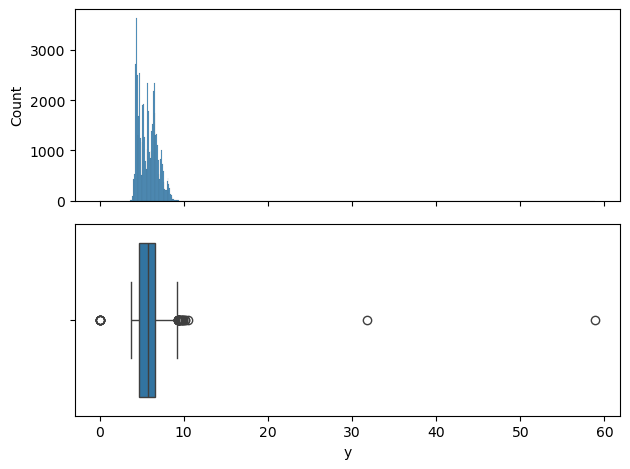

In [19]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='y', ax=ax[0])
sns.boxplot(df_numeric, x='y', ax=ax[1])
plt.tight_layout()
plt.show()

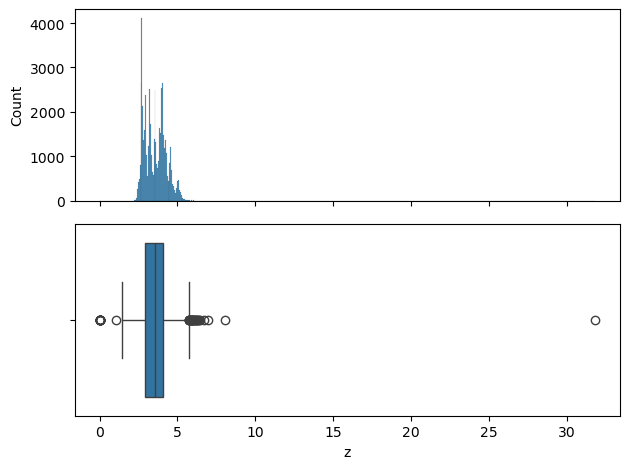

In [20]:
fig, ax = plt.subplots(2,1, sharex=True)
sns.histplot(df_numeric, x='z', ax=ax[0])
sns.boxplot(df_numeric, x='z', ax=ax[1])
plt.tight_layout()
plt.show()

## MinMaxScaler

In [21]:

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df_numeric)

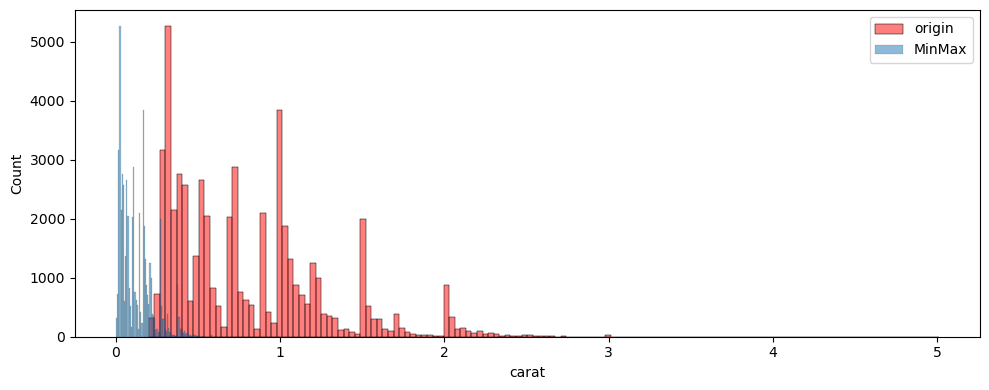

In [26]:
variable = 'carat'
plt.figure(figsize = (10,4))

sns.histplot(df, x=variable, color='red', alpha=0.5, label = 'origin')
sns.histplot(minmax_df, x=variable, alpha=0.5, label ='MinMax')
plt.tight_layout()
plt.legend()
plt.show()

## StandardScaler

In [27]:
scaler = StandardScaler()
standar_df = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

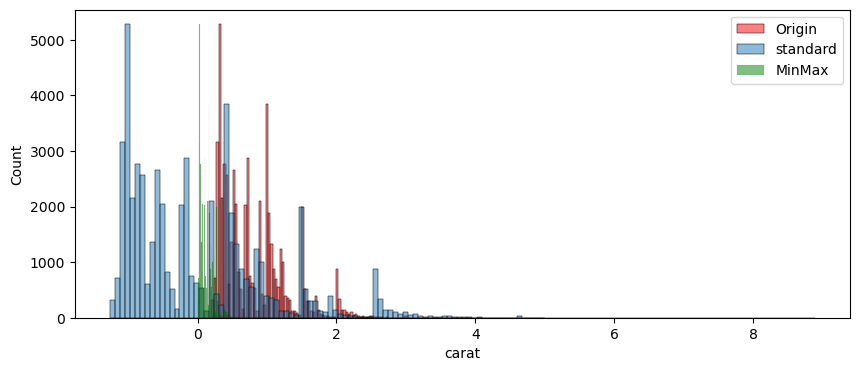

In [28]:
plt.figure(figsize = (10,4))

sns.histplot(df, x=variable, color='red', alpha=0.5, label = 'Origin')
sns.histplot(standar_df, x=variable, alpha=0.5, label='standard')
sns.histplot(minmax_df, x=variable, alpha=0.5, color='green', label='MinMax')
plt.legend()
plt.show()